In [1]:
import pandas as pd
import numpy as np
WIKI_UNI_manual_csv = "/mnt/code/users/xuziyang/PromptBias/outputs/openprompt/manual_prompt/bert-base-cased/LAMA/debias_answer_type_tokens/origin_embedding/uni_difference_debias.csv"
preds_save = "/mnt/code/users/xuziyang/PromptBias/outputs/openprompt/manual_prompt/bert-base-cased/LAMA/debias_answer_type_tokens/origin_embedding/preds.pt"

[7 8 9]


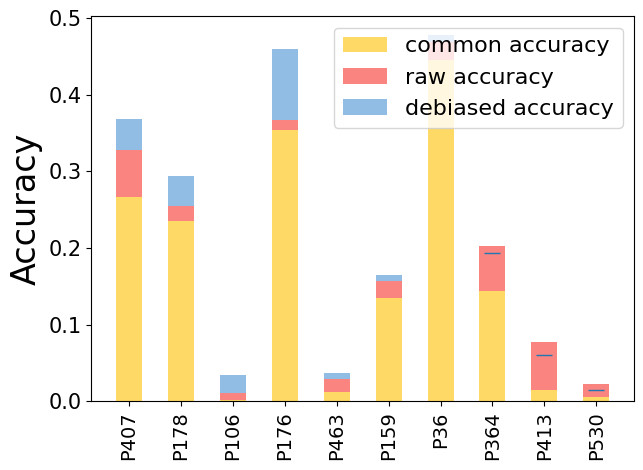

In [2]:
legend_size =  16
x_label_size = 20
y_label_size = 24
x_ticks = 14
y_ticks = 15
width=0.5

import random
random.seed(13)

# 需要展示的relation个数
show_num = 10


df = pd.read_csv(WIKI_UNI_manual_csv)
origin_prec = df["origin"].values
debias_prec = df["debias"].values
xlabels = df["relation"].values

import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,1,figsize=(7,5))
relation_num = len(origin_prec)


import random
# 从0到40之间选择10个不重复的随机数字
random_idx = random.sample(range(relation_num), show_num)

handle1 = axs.bar(range(len(random_idx)), debias_prec[random_idx], fc="#91bce3", label="debiased accuracy", width=width)
handle2 = axs.bar(range(len(random_idx)), origin_prec[random_idx], color="#fa8480",label="raw accuracy", width=width)
t = (debias_prec-origin_prec)[random_idx]

index = np.where(t<0)[0]
print(index)

# axs.bar(range(relation_num), debias_prec, fc="#91bce3", alpha=0.2, hatch='-')
# axs.bar(range(relation_num), origin_prec,color="#fa8480",alpha=0.15,)
# axs.bar(range(relation_num), origin_prec,ec="blue",alpha=0.)
axs.legend()
# axs.set_xticks(r)
axs.set_xticks(range(len(random_idx)))
_ = axs.set_xticklabels(np.array(xlabels)[random_idx].tolist(),rotation=90)

# preds_save = "/home/jiao/code/prompt/OptiPrompt_bk/TruelyKnow/outputs/openprompt/manual_prompt/bert-base-cased/LAMA/debias_answer_type_tokens/origin_embedding/preds.pt"
import torch
preds_dict = torch.load(preds_save)
preds_dict


# 计算某个relation的公共进度
temp = preds_dict["WIKI-UNI"]
preds_df = {rel:pd.DataFrame(temp[rel]['data']) for rel in xlabels}
common_acc = {}
for rel in xlabels:
    df = preds_df[rel]
#     all_nums = df.shape[0]
    common_df = df.query("obj_labels==raw_preds and obj_labels==debiased_preds")
    acc = common_df.shape[0]/df.shape[0]
    common_acc[rel] = acc


    
handle3 = axs.bar(range(len(random_idx)), torch.tensor([common_acc[rel] for rel in xlabels])[random_idx].tolist(), fc="#ffd966",label="common accuracy", width=width)
axs.legend(fontsize=legend_size,handles=[handle3,handle2,handle1])
plt.xticks(fontsize=x_ticks)
plt.yticks(fontsize=y_ticks)
# axs.set_ylabel("precision",fontsize=y_label_size)
axs.plot(index, debias_prec[random_idx][index], linestyle='',marker='_',markerfacecolor='#91bce3',markersize=12)
axs.set_ylabel("Accuracy",fontsize=y_label_size)
fig.savefig("common_acc.pdf",dpi=500, bbox_inches="tight")


[7 8 9]


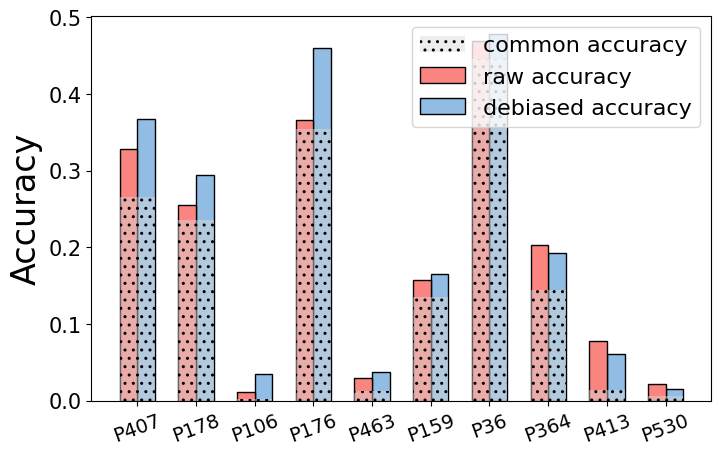

In [3]:
legend_size =  16
x_label_size = 20
y_label_size = 24
x_ticks = 14
y_ticks = 15
width=0.3

import random
random.seed(13)

# 需要展示的relation个数
show_num = 10


df = pd.read_csv(WIKI_UNI_manual_csv)
origin_prec = df["origin"].values
debias_prec = df["debias"].values
xlabels = df["relation"].values

import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,1,figsize=(8,5))
relation_num = len(origin_prec)


import random
# 从0到40之间选择10个不重复的随机数字
random_idx = random.sample(range(relation_num), show_num)

handle1 = axs.bar(np.array(range(len(random_idx)))+width, debias_prec[random_idx], fc="#91bce3", label="debiased accuracy", width=width,edgecolor="black")
handle2 = axs.bar(range(len(random_idx)), origin_prec[random_idx], color="#fa8480",label="raw accuracy", width=width,edgecolor="black")
t = (debias_prec-origin_prec)[random_idx]

index = np.where(t<0)[0]
print(index)

# axs.bar(range(relation_num), debias_prec, fc="#91bce3", alpha=0.2, hatch='-')
# axs.bar(range(relation_num), origin_prec,color="#fa8480",alpha=0.15,)
# axs.bar(range(relation_num), origin_prec,ec="blue",alpha=0.)
axs.legend()
# axs.set_xticks(r)
axs.set_xticks(np.array(range(len(random_idx)))+width/2)
_ = axs.set_xticklabels(np.array(xlabels)[random_idx].tolist(),rotation=20)

# preds_save = "/home/jiao/code/prompt/OptiPrompt_bk/TruelyKnow/outputs/openprompt/manual_prompt/bert-base-cased/LAMA/debias_answer_type_tokens/origin_embedding/preds.pt"
import torch
preds_dict = torch.load(preds_save)
preds_dict


# 计算某个relation的公共进度
temp = preds_dict["WIKI-UNI"]
preds_df = {rel:pd.DataFrame(temp[rel]['data']) for rel in xlabels}
common_acc = {}
for rel in xlabels:
    df = preds_df[rel]
#     all_nums = df.shape[0]
    common_df = df.query("obj_labels==raw_preds and obj_labels==debiased_preds")
    acc = common_df.shape[0]/df.shape[0]
    common_acc[rel] = acc


    
handle3 = axs.bar(
    np.array(range(len(random_idx)))+width/2, 
    torch.tensor([common_acc[rel] for rel in xlabels])[random_idx].tolist(), 
    hatch='..',
    # alpha=0.5,
    # color=None,
    # edgecolor='#D9D9D9',
    fc="#D9D9D977",
    label="common accuracy", width=2*width)
axs.legend(fontsize=legend_size,handles=[handle3,handle2,handle1])
plt.xticks(fontsize=x_ticks)
plt.yticks(fontsize=y_ticks)
# axs.set_ylabel("precision",fontsize=y_label_size)

# axs.plot(index, debias_prec[random_idx][index], linestyle='',marker='_',markerfacecolor='#91bce3',markersize=12)
axs.set_ylabel("Accuracy",fontsize=y_label_size)
fig.savefig("common_acc.pdf",dpi=500, bbox_inches="tight")


In [4]:
rels_df = pd.read_csv("/mnt/code/users/xuziyang/PromptBias/code/analysis/relation_type.csv")
relations = list(rels_df["relation"])
types = list(rels_df["type"])
labels = list(rels_df["label"])
values = list(zip(types,labels))
rels_dict = dict(zip(relations,values))

[0.5369978858350951, 0.5542427497314716, 0.33924843423799583, 0.34080717488789236, 0.3752913752913753, 0.4170168067226891, 0.15292841648590022, 0.060085836909871244, 0.10041407867494824, 0.17418032786885246]
[0.0, 0.24704618689581095, 0.0, 0.03811659192825112, 0.02564102564102564, 0.18382352941176472, 0.1735357917570499, 0.0, 0.062111801242236024, 0.0194672131147541]
['carbon', 0.0, 0.24704618689581095, 0.0, 0.03811659192825112, 0.02564102564102564, 0.18382352941176472, 0.1735357917570499, 0.0, 0.062111801242236024]


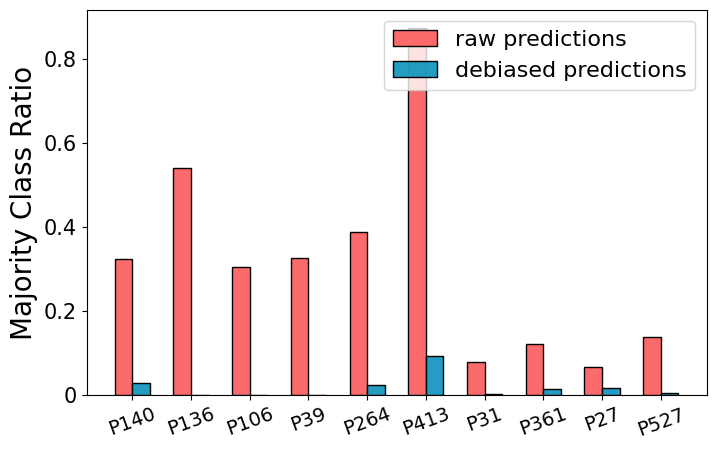

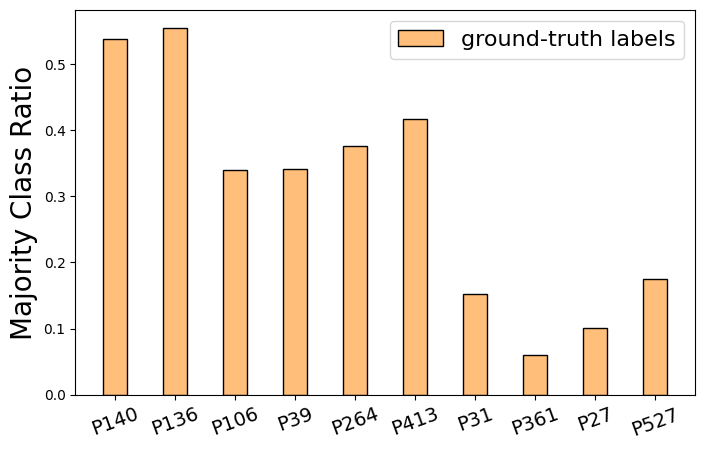

In [67]:
show_num=10
legend_size =  16
x_label_size = 20
y_label_size = 20
x_ticks = 14
y_ticks = 15
width=0.3


import torch
LAMA_manual_csv = "/mnt/code/users/xuziyang/PromptBias/outputs/openprompt/manual_prompt/bert-base-cased/LAMA/debias_answer_type_tokens/origin_embedding/lama_difference_debias.csv"
LAMA_opti_csv = "/mnt/code/users/xuziyang/PromptBias/outputs/openprompt/continue_prompt/bert-base-cased/optiprompt_5/debias_answer_type_tokens/origin_embedding/exp_1/lama_difference_debias.csv"
manual_df = pd.read_csv(LAMA_manual_csv)
opti_df = pd.read_csv(LAMA_opti_csv)
manual_origin_prec = manual_df["origin"].values
manual_debias_prec = manual_df["debias"].values
opti_origin_prec = opti_df["origin"].values
opti_debias_prec = opti_df["debias"].values
xlabels = manual_df["relation"].values

index = list(range(len(xlabels)))

diff = opti_origin_prec-manual_origin_prec
t  = list(zip(diff,index))
st = sorted(t,reverse=True)



part = st[0:show_num]
part_index = [item[1] for item in part]
part_value = [item[0] for item in part]


data_major_ref = {}
data_majority = []
opti_majority = []
lama_majority = []
debias_opti_majority = []

opti_preds_save = "/mnt/code/users/xuziyang/PromptBias/outputs/openprompt/continue_prompt/bert-base-cased/optiprompt_5/debias_answer_type_tokens/origin_embedding/exp_1/preds.pt"
opti_preds_dict = torch.load(opti_preds_save)
opti_preds = opti_preds_dict["LAMA"]
opti_preds_df = {rel:pd.DataFrame(opti_preds[rel]['data']) for rel in xlabels}
part_rels =  xlabels[part_index]

# 统计manual
manual_preds_save = "/mnt/code/users/xuziyang/PromptBias/outputs/openprompt/manual_prompt/bert-base-cased/LAMA/debias_answer_type_tokens/origin_embedding/preds.pt"

manual_preds_dict = torch.load(manual_preds_save)
manual_preds = manual_preds_dict["LAMA"]
manual_preds_df = {rel:pd.DataFrame(manual_preds[rel]['data']) for rel in xlabels}
part_rels =  xlabels[part_index]

assert (opti_preds_df["P19"]["obj_labels"].values == manual_preds_df["P19"]["obj_labels"].values).all()
for rel in part_rels:
    df = opti_preds_df[rel]
    majority = df["obj_labels"].value_counts().index[0]
    data_major_ref[rel] = majority
    data_majority.append(df["obj_labels"].value_counts().values[0]/df.shape[0])



not_majority_data_raw_prediction = []
not_majority_data_debiased_prediction = []

for rel in part_rels:
    df = opti_preds_df[rel]
    # 统计opti最大预测类别的数量
    # raw_preds = df["raw_preds"]
    # temp = raw_preds.value_counts()[data_major_ref[rel]]
    # majority = temp/df.shape[0]

    # 统计opti中对于ground truth不是最大类别，反而预测成最大类别的个数
    raw_preds = df[df["obj_labels"]!=data_major_ref[rel]]["raw_preds"]
    debiased_preds = df[df["obj_labels"]!=data_major_ref[rel]]["debiased_preds"]
    try:
        not_majority_data_raw_prediction.append(raw_preds.value_counts()[data_major_ref[rel]]/raw_preds.shape[0])
    except:
        not_majority_data_raw_prediction.append(0)
    try:
        not_majority_data_debiased_prediction.append(debiased_preds.value_counts()[data_major_ref[rel]]/debiased_preds.shape[0])
    except:
        not_majority_data_debiased_prediction.append(0)


    # 修改成正確比例的majority TODO
    # temp = df.query("obj_labels==raw_preds")["raw_preds"].value_counts()[data_major_ref[rel]]
    # majority = temp/df.shape[0]


    opti_majority.append(majority)

    try:
        temp = df["debiased_preds"].value_counts()[data_major_ref[rel]]
    except:
        temp = 0
    majority = temp/df.shape[0]
    debias_opti_majority.append(majority)



    df = manual_preds_df[rel]
    raw_preds = df["raw_preds"]
    # 统计manual最大预测类别的数量
    try:
        temp = raw_preds.value_counts()[data_major_ref[rel]]
    except:
        temp = 0
    majority = temp/df.shape[0]
    lama_majority.append(majority)

print(data_majority)
print(lama_majority)
print(opti_majority)


part_manual_origin_prec = manual_origin_prec[part_index]
part_manual_debias_prec = -manual_debias_prec[part_index]
part_opti_origin_prec = opti_origin_prec[part_index]
part_opti_debias_prec = opti_debias_prec[part_index]
part_xlabels = xlabels[part_index]
# part_xlabels = [ rels_dict[r][1] for r in part_xlabels]
# part_xlabels = rels_df.query()["label"].values

fig,axs = plt.subplots(1,1,figsize=(8,5))
axs.set_xticks(np.array(range(len(part_xlabels)))+width/2)
_ = axs.set_xticklabels(part_xlabels,rotation=20, fontsize=x_ticks)
# ylabels = [0.8,0.6,0.4,0.2,0.0,0.2,0.4]
# ylabels.reverse()
# # axs.set_yticks(range(len(ylabels)))
# axs.set_yticklabels(ylabels,)
x = np.arange(len(part_xlabels))

# handle1  = axs.bar(x-width/2,part_manual_debias_prec,width,label="manual debiased prec",fc="#91bce3")
# handle2 = axs.bar(x-width/2,part_manual_origin_prec,width,label="manual raw prec",color="#e18780")


handle3 = axs.bar(x,not_majority_data_raw_prediction,width,label="raw predictions",color="#fb6b6b",edgecolor="black")
handle4 = axs.bar(x+width,not_majority_data_debiased_prediction,width,label="debiased predictions",fc="#0a91bce3", edgecolor="black")

# handle5 = axs.bar(x, opti_majority, width, label="majority predictions", hatch='o', fc="#D9D9D977", )


# l1 = axs.legend(handles=[handle4,handle5],loc="upper right")
# plt.set_yticks(fontsize=10)
axs.set_ylabel("Majority Class Ratio",fontsize=y_label_size,)

# 绘制majority
# handle5, = axs.plot(opti_majority,label="opti raw majority",lw=3)

# handle6, = axs.plot(lama_majority,color="g",label="manual raw majortiy",lw=3,)
# handle7, = axs.plot(data_majority,
#     color="black",
#     label="true ratio in dataset",marker="*",
#     linestyle="")
# l2 = axs.legend(handles=[handle5,handle7],loc="lower right")
# axs.add_artist(l1,)
axs.legend(fontsize=legend_size)
# axs.set_ylim(0,0.9)
axs.set_yticks(np.arange(0, 0.9, 0.2))
axs.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8'])
axs.tick_params(axis='y', labelsize=y_ticks)


fig.savefig("prediction_majority_ratio.pdf",dpi=500, bbox_inches="tight")



fig2,axs2 = plt.subplots(1,1,figsize=(8,5))
axs2.bar(x, data_majority, width=0.4, edgecolor="black", color="#FFBE7A", label="ground-truth labels")
axs2.set_ylabel("Majority Class Ratio",fontsize=y_label_size,)
axs2.set_xticks(np.array(range(len(part_xlabels))))
_ = axs2.set_xticklabels(part_xlabels,rotation=20, fontsize=x_ticks)
axs2.legend(fontsize=legend_size)
# axs2.set_ylim(0,0.9)
# axs2.set_yticks(np.arange(0, 0.9, 0.2))
# axs2.tick_params(axis='y', labelsize=y_ticks)
# axs2.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8'])

fig2.savefig("dataset_majority_ratio.pdf",dpi=500, bbox_inches="tight")



In [29]:
not_majority_data_raw_prediction = []
not_majority_data_debiased_prediction = []
for rel in part_rels:
    df = opti_preds_df[rel]
    # 统计opti最大预测类别的数量
    # raw_preds = df["raw_preds"]
    # temp = raw_preds.value_counts()[data_major_ref[rel]]
    # majority = temp/df.shape[0]

    # 统计opti中对于ground truth不是最大类别，反而预测成最大类别的个数
    raw_preds = df[df["obj_labels"]!=data_major_ref[rel]]["raw_preds"]
    debiased_preds = df[df["obj_labels"]!=data_major_ref[rel]]["debiased_preds"]
    try:
        not_majority_data_raw_prediction.append(raw_preds.value_counts()[data_major_ref[rel]]/raw_preds.shape[0])
    except:
        not_majority_data_raw_prediction.append(0)
    try:
        not_majority_data_debiased_prediction.append(debiased_preds.value_counts()[data_major_ref[rel]]/debiased_preds.shape[0])
    except:
        not_majority_data_debiased_prediction.append(0)

In [39]:
df  = opti_preds_df["P140"]
raw_preds = df[df["obj_labels"]!=data_major_ref["P140"]]["raw_preds"]
raw_preds.value_counts()["Islam"]


71

In [11]:
debiased_preds.shape

(219,)

In [17]:
df["debiased_preds"].value_counts()[data_major_ref[rel]]

'actor'

In [14]:
df

,index,sub_label,obj_labels,raw_preds,debiased_preds
0,0,Shreela Ghosh,actor,actor,cricketer
1,1,Naomi Shihab Nye,poet,politician,diplomat
2,2,Frits Helmuth,actor,composer,painter
3,3,Lillian Leighton,actor,actor,librarian
4,4,Halle Berry,model,actor,feminist
...,...,...,...,...,...
953,953,Dolo Coker,pianist,actor,rabbi
954,954,Joseph Cowen,politician,politician,merchant
955,955,Daniel Showalter,politician,actor,jurist
956,956,Peter Florin,diplomat,politician,librarian


In [32]:
part_opti_origin_prec

array([0.77167019, 0.64876477, 0.32150313, 0.38116592, 0.41491841])

In [33]:
opti_majority

[0.5221987315010571,
 0.5155746509129968,
 0.1951983298538622,
 0.10538116591928251,
 0.22144522144522144]

In [17]:
df.query("obj_labels==raw_preds")["raw_preds"].value_counts()

raw_preds
EMI       48
Motown     9
Name: count, dtype: int64

In [29]:
opti_preds_df[rel]

,index,sub_label,obj_labels,raw_preds,debiased_preds
0,0,Buddy Holly,Decca,Motown,Brunswick
1,1,Buddy Holly,Brunswick,Motown,Brunswick
2,2,Bill Haley & His Comets,Decca,Motown,Brunswick
3,3,Owen Bradley,Decca,EMI,Zeus
4,4,The Crickets,Brunswick,Decca,Opus
...,...,...,...,...,...
424,424,Sandra Tilley,Motown,Motown,Opus
425,425,Jimmy Mack,Motown,Motown,Brunswick
426,426,Honey Chile,Motown,EMI,Europa
427,427,High Inergy,Motown,EMI,Communion


In [20]:
preds_df["P27"]["obj_labels"].unique().shape

(85,)

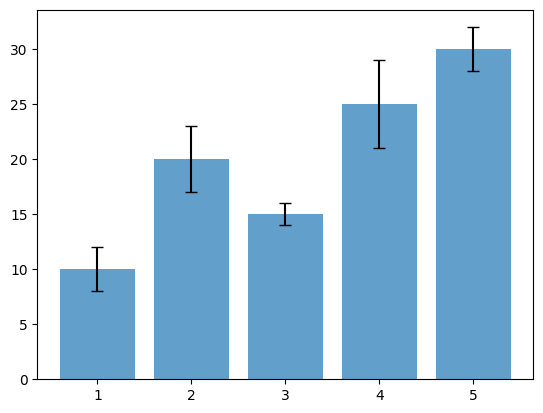

In [62]:
x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]
error = [2, 3, 1, 4, 2]  # 上下误差范围

# 绘制柱状图，并设置阴影效果
plt.bar(x, y, yerr=error, capsize=4, alpha=0.7)

# 显示图形
plt.show()

In [29]:
torch.tensor(range(relation_num))[random_idx].tolist()

[14, 31, 8, 13, 21, 18, 3, 1, 24, 39]

In [26]:
torch.tensor(range(len(xlabels)))[random_idx].tolist()

[9, 8, 5, 37, 0, 12, 13, 23, 26, 1]

In [14]:
xlabels = ["00","11"]
np.array(xlabels).tolist()

['00', '11']

In [7]:
import torch
torch.tensor(range(5))

tensor([0, 1, 2, 3, 4])